<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Fedbatch/blob/main/BPL_TEST2_Fedbatch_fmpy_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Fedbatch script with FMPy

The key library FMPy is installed.

After the installation a small application BPL_TEST2_Fedbatch is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [2]:
!python --version

Python 3.11.13


In [3]:
!pip install fmpy # Install the key package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 74.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.1 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.

# BPL_TEST2_Fedbatch setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Fedbatch_linux_om_me.fmu
* Setup-file - BPL_TEST2_Fedbatch_fmpy_explore.py

In [1]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Fedbatch

fatal: destination path 'BPL_TEST2_Fedbatch' already exists and is not an empty directory.


CalledProcessError: Command 'b'git clone https://github.com/janpeter19/BPL_TEST2_Fedbatch\n'' returned non-zero exit status 128.

In [2]:
%cd BPL_TEST2_Fedbatch

/content/BPL_TEST2_Fedbatch


In [3]:
run -i BPL_TEST2_Fedbatch_fmpy_explore.py

Linux - run FMU pre-compiled OpenModelica

Model for the process has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [5]:
import warnings
warnings.filterwarnings("ignore")

## BPL_TEST2_Fedbatch - demo



In [6]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter


Simplified text book model - only substrate S and cell concentration X



No processDiagram.png file in the FMU, but try the file on disk.


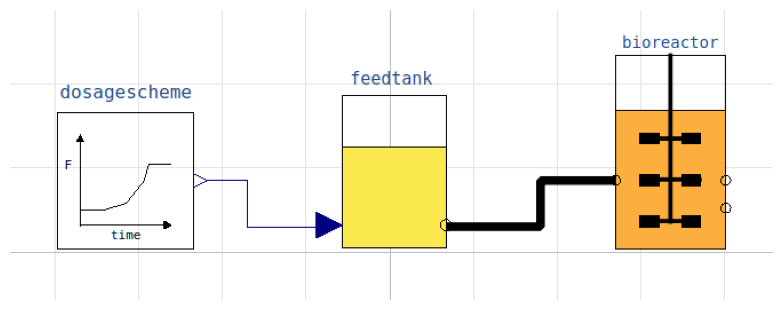

In [7]:
process_diagram()

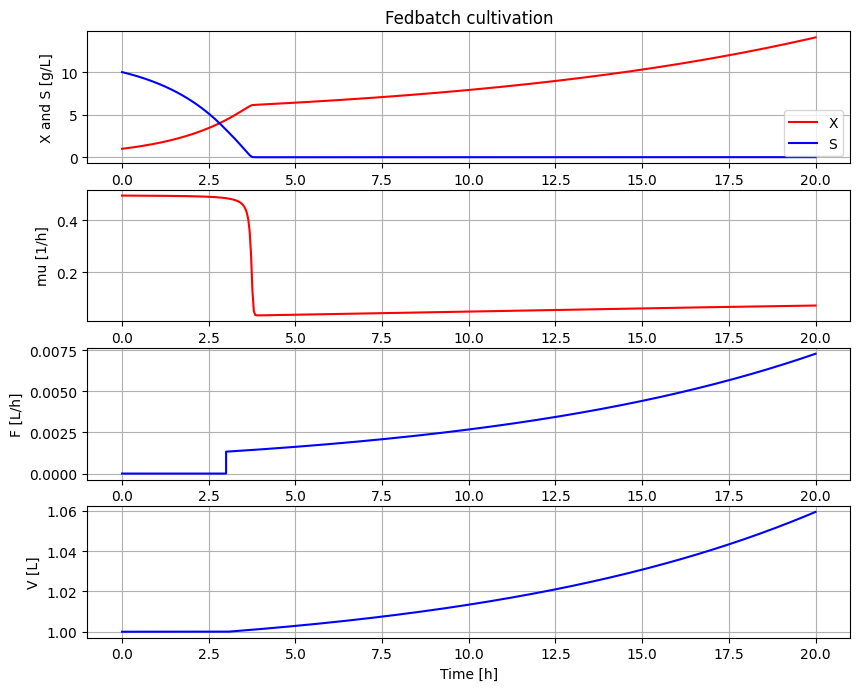

In [8]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu(20)

In [9]:
disp(mode='long')

bioreactor.V_start : V_start : 1.0
bioreactor.m_start[1] : VX_start : 0.0
bioreactor.m_start[2] : VS_start : 0.0
bioreactor.culture.Y : Y : 0.5
bioreactor.culture.qSmax : qSmax : 1.0
bioreactor.culture.Ks : Ks : 0.1
feedtank.c_in[2] : feedtank.S_in : 0.0
feedtank.V_start : feedtank.V_start : 100.0
dosagescheme.mu_feed : mu_feed : 0.2
dosagescheme.t_startExp : t_startExp : 2.0
dosagescheme.F_startExp : F_startExp : 0.12
dosagescheme.F_max : F_max : 3.0


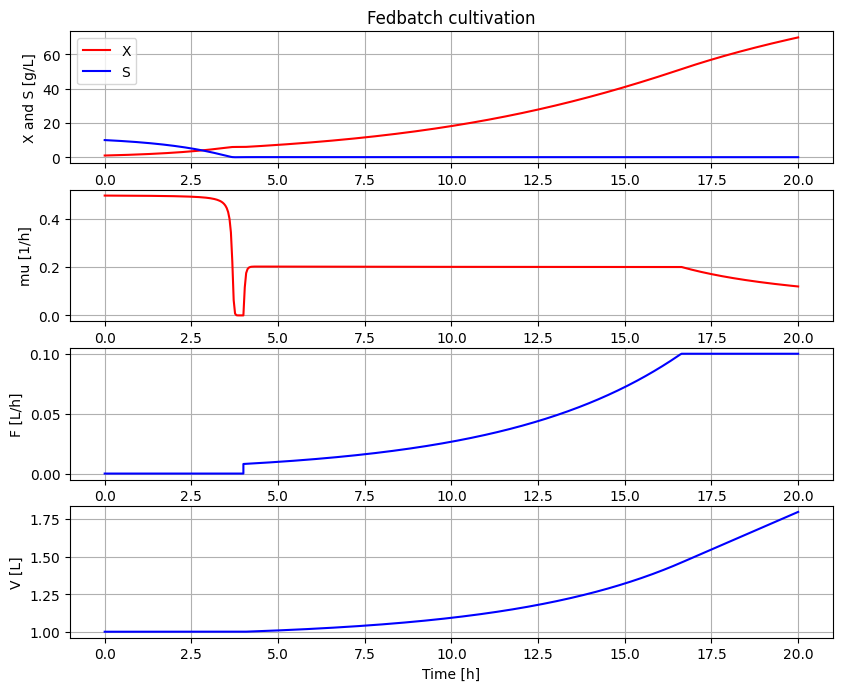

In [10]:
# A more typical feed scheme for the culture at hand
newplot(plotType='TimeSeries')
par(t_startExp=4, F_startExp=0.008, mu_feed=0.2, F_max=0.1)
simu(20)

In [11]:
disp('culture')

Y : 0.5
qSmax : 1.0
Ks : 0.1


In [12]:
describe('mu')

Cell specific growth rate variable : 0.12 [ 1/h ]


In [13]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'dosagescheme', 'feedtank']


In [14]:
describe('MSL')

MSL: 4.1.0 - used components: RealInput, RealOutput


In [15]:
system_info()


System information
 -OS: Linux
 -Python: 3.11.13
 -Scipy: not installed in the notebook
 -FMPy: 0.3.25
 -FMU by: OpenModelica Compiler OpenModelica 1.26.0~dev-99-gd55fe79
 -FMI: 2.0
 -Type: ME
 -Name: BPL.Examples_TEST2.Fedbatch
 -Generated: 2025-06-12T08:56:10Z
 -MSL: 4.1.0
 -Description: Bioprocess Library version 2.3.0
 -Interaction: FMU-explore for FMPy version 1.0.1
